In [1]:
import matplotlib.pyplot as plt
import itertools
import random
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

In [20]:
class City:
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races=2):
        self.width = width
        self.height = height
        self.races = races
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.empty_houses = []
        self.grid = np.matrix
        self.zero = np.zeros((self.height, self.width))

    def populate(self):
        #a list of tuples that represent each available city coord
        self.all_houses = list(itertools.product(range(self.width), range(self.height)))
        random.shuffle(self.all_houses)

        self.n_empty = int(self.empty_ratio * len(self.all_houses))
        self.empty_houses = self.all_houses[:self.n_empty] # all these are going to get 0 in matrix
        self.remaining_houses = self.all_houses[self.n_empty:] #the race they are value to these coords
        #[i::self.races] just causes the list to assign i to each '2nd - self.races' value. [0,1,0,1,0,1..] - I think
        houses_by_race = [self.remaining_houses[i::self.races] for i in range(self.races)]
        #okay, so now we have a list of lists, one for each race - containing which house has that race
        grid = self.zero.copy()
        grid = list(grid)
        for race in range(self.races):
            house_of_race = houses_by_race[race]
            for (a,b) in house_of_race:
                grid[a][b] = race+1
        self.grid = np.matrix(grid)
        
    def neighbours(self, grid):
        #if ever we consider a race fluid model: Convolution can work here when calculating satifaction
        (x,y) = coord
        #there is potential here for expansion to a larger nieghbourhood when considering satisfaction
        verts = [(x+1, y+1),(x+1, y),(x+1, y-1),(x, y+1),(x, y-1),(x-1, y+1),(x-1, y),(x-1, y-1)]
        verts = list(filter(lambda vert: (vert[0]>=0 and vert[1]>=0) and (vert[0]<self.height and vert[1]<self.width), verts))
        neighbors = [(grid[a][b]) for (a,b) in verts]
        
    def nieghbors_perc(self, coord, grid): # TODO: rename to percent neighbours
        (x,y) = coord
        #there is potential here for expansion to a larger nieghbourhood when considering satisfaction
        verts = [(x+1, y+1),(x+1, y),(x+1, y-1),(x, y+1),(x, y-1),(x-1, y+1),(x-1, y),(x-1, y-1)]
        verts = list(filter(lambda vert: (vert[0]>=0 and vert[1]>=0) and (vert[0]<self.height and vert[1]<self.width), verts))
        neighbors = [(grid[a][b]) for (a,b) in verts]
        counts = [] # the index here works counts[0] is how many of race 1
        for race in range(self.races):
            counts = counts + [neighbors.count(race+1)]
        total = len(neighbors) # sum(counts)
        if total!=0:
            proportions = [counts[i]/total for i in range(self.races)]
        else:
            print('ERROR: No neighbors')
            proportions = [0 for i in range(self.races)]
        return proportions, neighbors, verts
        #we must think wether we should segment neighbour finding etc to a different def
    
    def is_unsatisfied(self, coord, own_race, grid):
        proportions, neighbors, verts = self.nieghbors_perc(coord, grid)
        satisfaction = proportions[int(own_race-1)]
        #so currently everyone only makes a distinction between own race and other
        #and a empty spot is exactly the same as a full one, with other race

        return satisfaction, neighbors, verts
    
    def update_coord(self, coord, grid):
        (x,y) = coord
        own_race = self.grid[x,y]
        if own_race != 0:
            satisfaction, neighbors, verts = self.is_unsatisfied(coord, own_race, grid)
            if satisfaction<self.similarity_threshold:
                zero_neigh = [i for i,x in enumerate(neighbors) if x == 0]
                if zero_neigh !=[]:
                    avl_coords = [verts[i] for i in zero_neigh]
                    (a,b) = random.choice(avl_coords)
                    grid[a][b] = own_race
                    grid[x][y] = 0
        return grid
        
    def update_all(self):
        grid = self.grid.tolist()
        currently_occupied = np.nonzero(grid)
        currently_occupied = zip(currently_occupied[0], currently_occupied[1])
        for house in currently_occupied:
            grid = self.update_coord(house, grid)
        self.grid = np.matrix(grid)
        
    def plot(self):
        colors = 'black red blue magenta yellow'.split()
        cmap = matplotlib.colors.ListedColormap(colors, name='colors', N=None)

        plt.imshow(london.grid, cmap=cmap)
        plt.show()
        

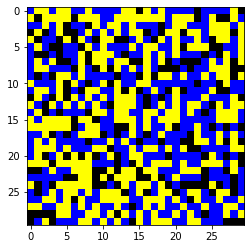

720


In [30]:
london = City(30,30,0.2, 0.5, 100, 2)
london.populate()
london.plot()
print(len(np.nonzero(london.grid)[1]))

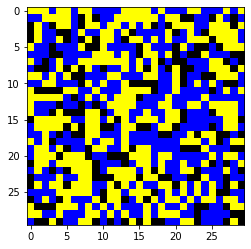

In [31]:
london.update_all()
london.plot()

In [34]:
for i in range(1000):
    london.update_all()

print(len(np.nonzero(london.grid)[1]))

720


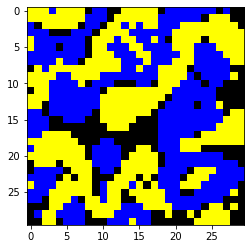

In [35]:
london.plot()
